# Project: Investigating the No-Show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains information about medical appointments booked by patients in Brazil, the focus of this is to inspect if the patients show up for their appointments or not and the factors that possible influences this.  There are 14 columns, out of which 13 of these columns are the predictor variables while 1 - "No-Show" is the target variable. 

Based on the information available in the available data, some of the possible questions that can be explored are:  
    - Is age a major determinant in a patients ability to meet up with appointments?     
    - Does gender influence the chances of a patient going for their appointment?  
    - Does getting an sms reminder help improve appointment attendance?  
    - Does a patient's neighbourhood influence their ability to honour their appointments?  

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

### Data Cleaning (Replace this with more specific notes!)

In [2]:
# We want to create a function that would be used to check info 

def Check_info(name):
    print(name.info())

In [3]:
# Loading the data and the first few lines are printed out, this affords us get familiar with the content of the dataset

Appointment_data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
Appointment_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Now we can get some basic information about the columns in the dataset e.g data types and missing values.

Check_info(Appointment_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


From the information above, we observe that there are fourteen columns in our dataset and there are no missing values in any of these columns. We can also see the different data types for each of the columns. With this, we can inspect if the columns are in the appropriate or desired data type or if we would need to make some adjustments. For example, it can be seen above that "No-show", our target variable is represented as a string, but we would prefer to have it as an interger. Hence, we would convert that column from string to integer.

In [5]:
# Chamging the "No-show" column from string to numbers.

Appointment_data['No-show'] = Appointment_data['No-show'].map({'No': 0, 'Yes': 1})
#Appointment_data['No-show'] = pd.to_numeric(Appointment_data['No-show'])
Check_info(Appointment_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB
None


In [6]:
# Here want to insect the number of rows and columns present in the dataset

Appointment_data.shape

(110527, 14)

The dataset being used in this project has 110,527 observations, while the number of columns, which can also be referred to as variables are 14. 

In [7]:
# With describe, we get a summary of the numerical variables in our dataset

Appointment_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [8]:
# Now let us find out the number of unique values in each of the columns in this dataset.

Appointment_data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The output above shows the number of unique values in each of the columns. From this, we get a sense of the distribution of values in each of these columns. For examples, we see that there are 104 different values in the age column. We also see that there are 81 different neighbourhoods listed in the data, and 27 different appointment dates. 

The result above gives a better understanding of the data we are working with. We can see that the age of the people captured in the dataset ranges from babies less than a year old to adults as old as 115yrs old.

Looking at the structure of our dataset, there are some columns that do not appear to be very important to our analysis. Hence, we would be dropping the column to make our dataset more concise.

In [9]:
Appointment_data = Appointment_data.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1)

In [10]:
Check_info(Appointment_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   Scholarship    110527 non-null  int64 
 4   Hipertension   110527 non-null  int64 
 5   Diabetes       110527 non-null  int64 
 6   Alcoholism     110527 non-null  int64 
 7   Handcap        110527 non-null  int64 
 8   SMS_received   110527 non-null  int64 
 9   No-show        110527 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 8.4+ MB
None


The dataset is more concise after removing some columns, but we can remove even more columns like "ScheduleedDay" and "AppointmentDay" since it doesn't appear to be needed for the questions that I intend to answer. 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:  Is age a major determinant in a patients ability to meet up with appointments?

Now that the dataset has been trimmed, we want to begin the process of answering the questions posed at the beginning of this project below.  
For this first question, we would like to know if the "Age" of patients at the hospital plays a role in their ability to show up for appointments.

C:\Users\Samuel Chika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


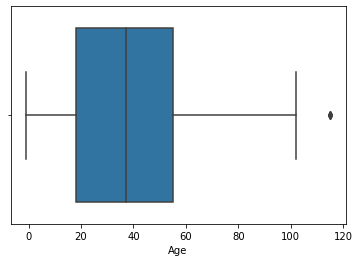

In [11]:
# Let's use the boxplot to inspect the distribution of age

sns.boxplot(Appointment_data.Age);
plt.show();

In [12]:
# Firstly, let us inspect the distribution of the age column

Appointment_data.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

From the result above, we can see that there is '-1' listed out as someone's age in the dataset, whcih is impossible. Since it is not possible for anyone to be minus one year old, and there is just one occurance of this, we can afford to drop that instance without making any significant alteration to the data in our dataset.

In [13]:
# Drop the column where the age equals -1

Appointment_data.drop(Appointment_data.query("Age == -1").index,inplace=True)

Now that all the ages we have in the dataset seem appropriate, we can now decide how we want to explore them. Considering the fact that we have a very wide range of age groups represented in our dataset, we would like to devide the age of patients in the entire dataset into groups. This would make it easier to explore.  

The different age group categories would be using in this dataset are listed below with the respective age ranges;

In [14]:
# Divide the age range in the dataset into age groups and calculate the number of patients in each age group

child = Appointment_data.query('Age < 13')
teen = Appointment_data.query('12 < Age < 20')
young_adult = Appointment_data.query('19 < Age < 35')
adult = Appointment_data.query('34 < Age < 70')
old_adult = Appointment_data.query('Age > 69')

children = child['No-show'].sum()
teens = teen['No-show'].sum()
young_adults = young_adult['No-show'].sum()
adults = adult['No-show'].sum()
old_adults = old_adult['No-show'].sum()

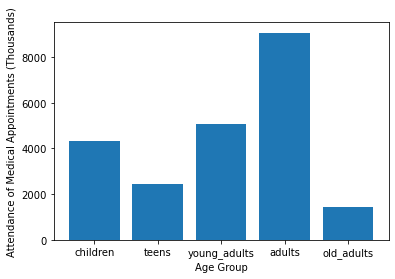

In [15]:
# Create a bar showing the attendance of medical appointments by age group

arrangements = [1, 2, 3, 4, 5]
age_group = [children, teens, young_adults, adults, old_adults]
labels = ['children', 'teens', 'young_adults', 'adults', 'old_adults']
plt.bar(arrangements, age_group, tick_label = labels);
plt.xlabel('Age Group')
plt.ylabel('Attendance of Medical Appointments (Thousands)');

From the chart above, we can see that adults between the age of 35 - 69yrs make up a majority of appointment attendance, that age have twice the number of the age group in second place. Also, the "old adults" have the least number of appointment attendance. However, there is no overwhelming evidence in this data that suggests age plays in the patient's ability to keep us with appointments.

### Research Question 3: - Does gender influence the chances of a patient going for their appointment?

In this section, the goal is to inspect the role of gender in the ability of a patient to attend medical appointments. We would explore the dataset and consider what the evidence available in the dataset would show us.

In [16]:
# Count the number of males and females represented in the dataset

Appointment_data.groupby(['Gender']).size()

Gender
F    71839
M    38687
dtype: int64

In [17]:
# To get the patients attendance grouped by gender

gender_grouping = Appointment_data.groupby("Gender")["No-show"].value_counts()
gender_grouping

Gender  No-show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: No-show, dtype: int64

Above, we have the attendance figurs for each gender. "F" stands for "Females while "M' stands for "Male". Also, "0" represents "absent", which is when a patient misses the medical appointment while "1" stands for "present", which indicates the times when the patient actually attended the medical appointment.

Percentage of Female attendance:  20.31
Percentage of Male attendance:  19.97


Text(0.5, 1.0, 'Appointment attendance by Gender')

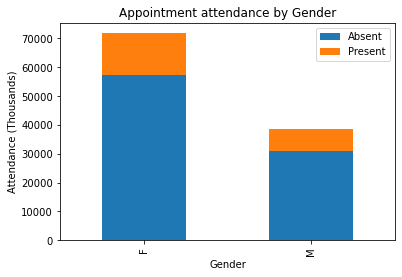

In [18]:
# Percentage of Patients who attended their appointment grouped by gender

F_percent = gender_grouping[1] / (gender_grouping[0] + gender_grouping[1])*100
M_percent = gender_grouping[3] / (gender_grouping[2] + gender_grouping[3])*100

print('Percentage of Female attendance: ', round(F_percent, 2))
print('Percentage of Male attendance: ', round(M_percent, 2))

Appointment_data.groupby("Gender")["No-show"].value_counts().unstack().plot(kind="bar",stacked=True);
plt.xlabel("Gender")
plt.ylabel("Attendance (Thousands)")
plt.legend(["Absent","Present"]);
plt.title("Appointment attendance by Gender")

We can see from above that while a lot more ladies showed up for their appointments, when we consider the attendance in terms of percentage, the gap between male and female attendance is not that wide. Therefore, the gender information is not sufficient in itself to tell us if a patient would attend the medical appointment or not.

### Research Question 3: Does getting an sms reminder help improve appointment attendance?

In this section, we are going cto consider the contribution of SMS reminders to the attendance of medical ppointments. We want to inspect of a patient is more likely to attend their medical appointment if they received an SMS reminder.

SMS_received  No-show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: No-show, dtype: int64


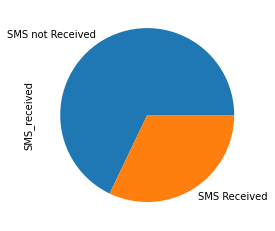

In [19]:
# Show the appointment attendance for both those who got SMS and those who did not.

SMS_info = Appointment_data.groupby("SMS_received")["No-show"].value_counts()
print(SMS_info)

Appointment_data["SMS_received"].value_counts().plot(kind="pie",labels=["SMS not Received","SMS Received"]);

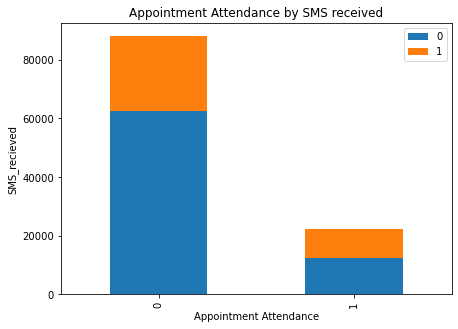

In [20]:
# This is a plot of Appointment attendance by SMS received. 

Appointment_data.groupby("No-show")["SMS_received"].value_counts().unstack().plot(kind="bar",stacked=True, figsize=(7,5))
plt.xlabel("Appointment Attendance")
plt.ylabel("SMS_recieved")
plt.title("Appointment Attendance by SMS received");
plt.legend();

In the plot above, '0" represents patients that did not receive SMS while '1' reprsents those that did. The blue portion of the bar represents those who did not attend their appointments while the orange portion represents those who attended their appointments. The plot suggests that SMS reminders probably influenced appointment attendance, because those who did not receive SMS were more likely to miss their appointments. However, thi information is not conclusive, further exploration would have to be done to ensure this is actually the case.

### Research Question 4: Does a patient's neighbourhood influence their ability to honour their appointments?

In this section, we are going to analyse the role neighbourhood plays in the ability of a patient to attend his or her medical appointment. We have 81 neighbourhoods listed in the dataset and now would like to see the roles they play in attendance.

In [21]:
# Count the number of patients in each neighbourhood that either attended or missed their appointments.

Neighbourhood_freq = Appointment_data.groupby('Neighbourhood')['No-show'].value_counts()
Neighbourhood_freq

Neighbourhood    No-show
AEROPORTO        0             7
                 1             1
ANDORINHAS       0          1741
                 1           521
ANTÔNIO HONÓRIO  0           221
                            ... 
TABUAZEIRO       1           573
UNIVERSITÁRIO    0           120
                 1            32
VILA RUBIM       0           710
                 1           141
Name: No-show, Length: 160, dtype: int64

In [22]:
# Create a table showing the percentage of attendance by neighbourhood

Neighbourhood_data = Neighbourhood_freq / Neighbourhood_freq.groupby(level=0).sum() * 100
Neighbourhood_data.unstack()

No-show,0,1
Neighbourhood,,
AEROPORTO,87.500000,12.500000
ANDORINHAS,76.967286,23.032714
ANTÔNIO HONÓRIO,81.549815,18.450185
ARIOVALDO FAVALESSA,78.014184,21.985816
BARRO VERMELHO,78.486998,21.513002
...,...,...
SÃO JOSÉ,78.351037,21.648963
SÃO PEDRO,78.962418,21.037582
TABUAZEIRO,81.704981,18.295019


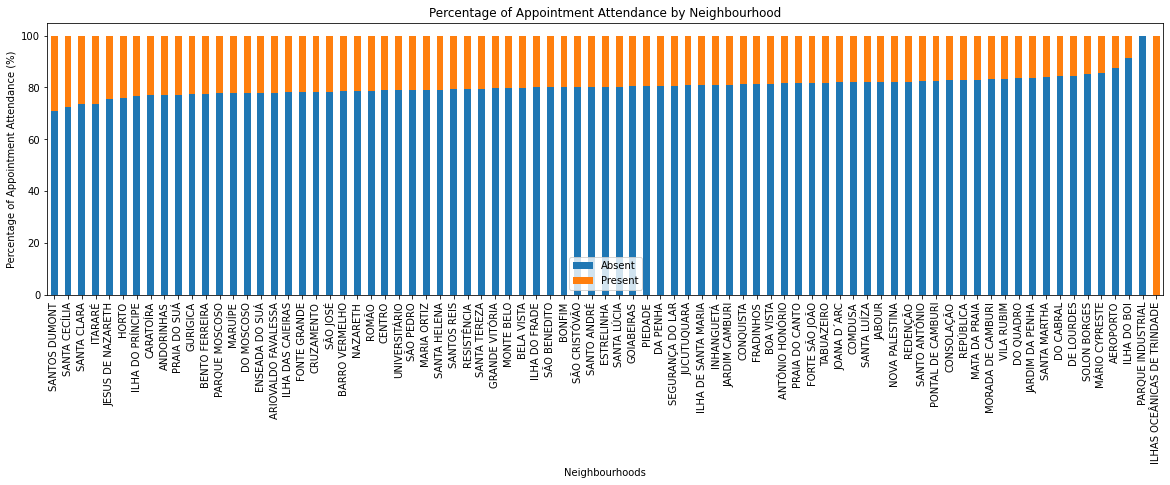

In [23]:
# percentage of patients missing their appointment in each neighbourhood

Neighbourhood_data.unstack().sort_values(by=0).plot(kind="bar",stacked=True, figsize=(20,5));
plt.xlabel("Neighbourhoods")
plt.ylabel("Percentage of Appointment Attendance (%)")
plt.legend(["Absent","Present"]);
plt.title("Percentage of Appointment Attendance by Neighbourhood");

From the plot above, it is diffcult to determine the role neighbourhood plays in appointment attendance. There are only two instances in this dataset where we can make a definite prediction. All the patients from "Parque Industrial" missed their appointments, while all the patients from "Ilhas Oceanicas de Trindade" attended their appointments. However, these are just two neighbourhoods out of eighty one, so we can't make any definite conclusions.

# Limitations

Some of limitations observed in the information available in the dataset are listed below:
- Looking at the dataset, there is not information about when the reminders were sent, relative to the patient's appointment date. If there is a wide gap between when the SMS reminder was sent and when the patient was supposed to go for their appointment, it is likely that the patient might forget about the appointment.  
- The dataset has no information explaining the distance between the hospitazl and the different neighbourhoods. Knowing this woud have given us a better oicture of how distance infuences the patient's ability to attend their medical appointments.  
- Some columns in the dataset were also not very explanatory. For example, the column named "Handcap" contains numbers ranging from 0 - 4, but there is no clear cut explanation of what these actually means. Since we are not really sure what it means, then it is much more difficult to use that column in making analysis.

<a id='conclusions'></a>
## Conclusions


At the beginning of this project, four questions were set out to be answered, these are 
- Is age a major determinant in a patients ability to meet up with appointments?  
- Does gender influence the chances of a patient going for their appointment?  
- Does getting an sms reminder help improve appointment attendance?  
- Does a patient's neighbourhood influence their ability to honour their appointments?  

After a careful anylysis of each of these questions, it was observed that non of the columns in our dataset possess sufficient proof in themselves to answer these questions beyond doubt. While the data gives pointers in some cases, it would be necessary for us to carry out further exploration before we can assertain the factor(s) responsible for determining the ability of a patient to attend his or her medicalz appointment.